# 렌터카 위치정보
## 월별 토요일의 렌터카 위치 정보 입니다. 
## 수집시각 기준 당일 05:00:00부터 익일 04:59:59까지의 데이터를 추출
## 기간: 2020년 1월부터 2021년 12월 까지

## 샘플데이터 1000개만 추출

In [4]:
import pandas as pd

location_data = pd.read_csv('위치정보_2021/위치정보_2021_08.csv')

# 처음 1000개의 행을 샘플링
location_sample_df = location_data.head(1000)

location_sample_df.info()
location_sample_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   oid            1000 non-null   object 
 1   collection_dt  1000 non-null   int64  
 2   longitude      1000 non-null   float64
 3   latitude       1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


,oid,collection_dt,longitude,latitude
0,46101334,20210814162933001,126.595720,33.489828
1,461000ec,20210814162933017,126.492056,33.495891
2,461002e3,20210814162933329,126.805983,33.374686
3,46100734,20210814162933423,126.412179,33.251136
4,46100734,20210814162933486,126.412179,33.251136


In [5]:
import pandas as pd
from geopy.geocoders import Nominatim

# Geopy의 Nominatim 객체 생성
geolocator = Nominatim(user_agent="geo_converter", timeout=10)

# 위치 정보 데이터프레임에 새로운 'address' 열 추가
location_sample_df['address'] = location_sample_df.apply(
    lambda row: geolocator.reverse((max(min(row['latitude'], 90), -90), row['longitude'])).address
    if -90 <= row['latitude'] <= 90 else None,
    axis=1
)

location_sample_df.head()

/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/869736916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_sample_df['address'] = location_sample_df.apply(


,oid,collection_dt,longitude,latitude,address
0,46101334,20210814162933001,126.595720,33.489828,"번영로, 봉개동, 제주시, 제주특별자치도, 63327, 대한민국"
1,461000ec,20210814162933017,126.492056,33.495891,"다호길, 도두이동, 제주시, 제주특별자치도, 63115, 대한민국"
2,461002e3,20210814162933329,126.805983,33.374686,"번영로, 하천리, 서귀포시, 제주특별자치도, 63635, 대한민국"
3,46100734,20210814162933423,126.412179,33.251136,"중문관광로72번길, 서귀포시, 제주특별자치도, 63535, 대한민국"
4,46100734,20210814162933486,126.412179,33.251136,"중문관광로72번길, 서귀포시, 제주특별자치도, 63535, 대한민국"


In [6]:
# 새로운 CSV 파일로 저장
location_sample_df.to_csv('location_address.csv', index=False)

In [29]:
import folium

# 지도 초기 설정
m = folium.Map(location=[33.3891, 126.5463], zoom_start=11)  # 제주시의 중심으로 초기화

# 데이터프레임 내의 각 행에 대해 마커 추가
for index, row in location_sample_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# 지도 저장 및 표시
m.save('map_with_markers_location.html')
m

In [23]:
# 'address' 열을 가지고 있는 데이터프레임에서 주소 데이터만 추출
address_df = location_sample_df[['address']]

# None 값을 제거하거나 다른 값으로 대체
address_df['address'] = address_df['address'].fillna('')  # None 값을 빈 문자열로 대체

# '대한민국'과 ', 제주특별자치도' 삭제
address_df['address'] = address_df['address'].str.replace(r', 대한민국|, 제주특별자치도', '', regex=True)

# 적용 후 데이터를 역순으로 정렬
address_df['address'] = address_df['address'].apply(lambda x: ', '.join(x.split(', ')[::-1]))

address_df.head()

# 새로운 CSV 파일로 저장
address_df.to_csv('address_only.csv', index=False, encoding='utf-8')


/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/1942446517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['address'] = address_df['address'].fillna('')  # None 값을 빈 문자열로 대체
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/1942446517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['address'] = address_df['address'].str.replace(r', 대한민국|, 제주특별자치도', '', regex=True)
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/1942446517.py:11: Set

In [24]:
# 'address' 열의 결측값을 빈 문자열로 대체
address_df['address'] = address_df['address'].fillna('')

# address 열에서 제일 마지막 콤마 뒤의 데이터 추출
address_df['last_part'] = address_df['address'].apply(lambda x: x.rsplit(', ', 1)[-1])

# 결과 출력
print(address_df['last_part'])

0            번영로
1            다호길
2            번영로
3      중문관광로72번길
4      중문관광로72번길
         ...    
995         이어도로
996        1100로
997          월각로
998         일주서로
999          월각로
Name: last_part, Length: 1000, dtype: object


/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/3695089500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['address'] = address_df['address'].fillna('')
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/3695089500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['last_part'] = address_df['address'].apply(lambda x: x.rsplit(', ', 1)[-1])


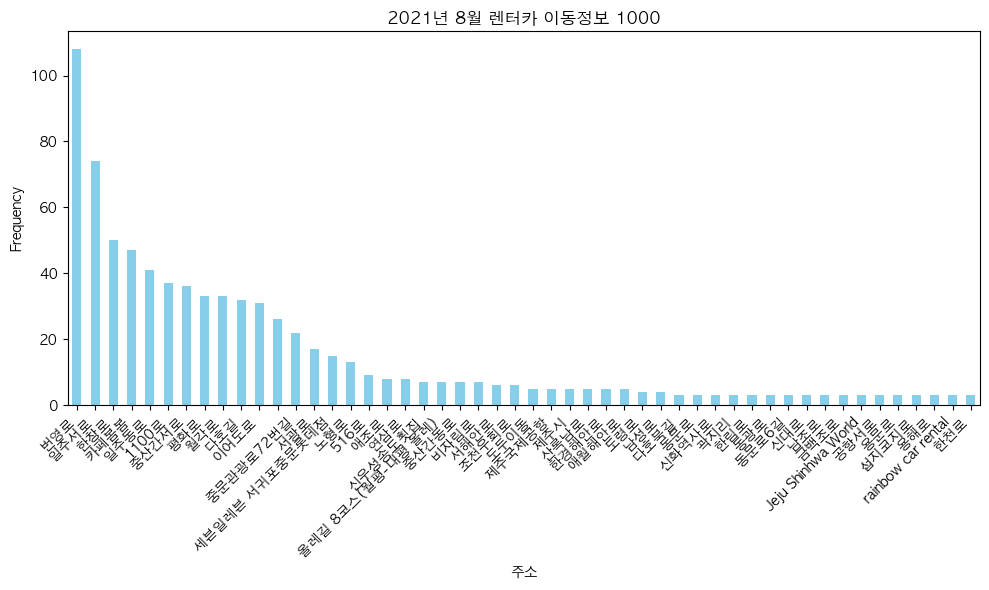

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

# '맑은 고딕' 폰트 설정
fm._get_fontconfig_fonts()
matplotlib.rc('font', family='AppleGothic')

# 'last_part' 열에서 키워드 빈도 계산
keyword_counts = address_df['last_part'].value_counts()

# 가장 많이 나오는 키워드 순으로 정렬
sorted_keywords = keyword_counts.sort_values(ascending=False)

# 상위 10개 키워드 추출 (원하는 개수로 수정 가능)
top_keywords = sorted_keywords.head(50)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title('2021년 8월 렌터카 이동정보 1000')
plt.xlabel('주소')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [231]:
# 상위 11개 키워드 추출 (원하는 개수로 수정 가능)
top_keywords = sorted_keywords.head(11)

In [40]:
!pip install folium


# 체류거점
## 월별 토요일의 렌터카 체류 거점 위치정보 입니다. 
## 체류 거점은 수집시간 전로그와 후로그의 시각차이가 20분 이상인 경우, 전로그의 위치를 의미합니다. 
## 기간: 2020년 1월부터 2021년 12월 까지

## 2021년 8월 한달만 샘플데이터 100개만 추출해서 전처리진행 - 이유 : 데이터 양이 너무 많음 ->1000개로 수정

In [40]:
import pandas as pd

foothold_data = pd.read_csv('체류거점_2021/체류거점_2021_08.csv')

# 처음 1000개의 행을 샘플링
foothold_sample_df = foothold_data.head(1000)

foothold_sample_df.info()
foothold_sample_df.head()


In [42]:
import pandas as pd
from geopy.geocoders import Nominatim

# Geopy의 Nominatim 객체 생성
geolocator = Nominatim(user_agent="geo_converter", timeout=10)

# 위치 정보 데이터프레임에 새로운 'address' 열 추가
foothold_sample_df['address'] = foothold_sample_df.apply(
    lambda row: geolocator.reverse((max(min(row['latitude'], 90), -90), row['longitude'])).address
    if -90 <= row['latitude'] <= 90 else None,
    axis=1
)

foothold_sample_df.head()

/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/91646904.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothold_sample_df['address'] = foothold_sample_df.apply(


,oid,collection_dt,longitude,latitude,time,Diff,address
0,46100025,20210807103200,126.497960,33.518425,2021-08-07 10:32:00,1209,"제주카페거리(어영마을), 제주시, 제주특별자치도, 63114, 대한민국"
1,46100025,20210807120230,126.415192,33.245735,2021-08-07 12:02:30,11987,"퍼시픽랜드 1주차장, 154-17, 중문관광로, 서귀포시, 제주특별자치도, 6353..."
2,46100025,20210807153730,126.500105,33.488141,2021-08-07 15:37:30,5254,"문송1길, 제주시, 제주특별자치도, 63122, 대한민국"
3,46100025,20210807180530,126.414921,33.245206,2021-08-07 18:05:30,3420,"퍼시픽랜드 1주차장, 154-17, 중문관광로, 서귀포시, 제주특별자치도, 6353..."
4,46100025,20210807193200,126.520270,33.255040,2021-08-07 19:32:00,570324,"서호동, 서귀포시, 제주특별자치도, 63566, 대한민국"


In [43]:
import folium

# 지도 초기 설정
m = folium.Map(location=[33.3891, 126.5463], zoom_start=10)  # 제주시의 중심으로 초기화

# 데이터프레임 내의 각 행에 대해 마커 추가
for index, row in foothold_sample_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# 지도 저장 및 표시
m.save('map_with_markers_location.html')
m


In [44]:
# 새로운 CSV 파일로 저장
foothold_sample_df.to_csv('foothold_address.csv', index=False)

In [46]:
# 'address' 열을 가지고 있는 데이터프레임에서 주소 데이터만 추출
foothold_df = foothold_sample_df[['address']]

# None 값을 제거하거나 다른 값으로 대체
foothold_df['address'] = foothold_df['address'].fillna('')  # None 값을 빈 문자열로 대체

# '대한민국'과 ', 제주특별자치도' 삭제
foothold_df['address'] = foothold_df['address'].str.replace(r', 대한민국|, 제주특별자치도', '', regex=True)

# 적용 후 데이터를 역순으로 정렬
foothold_df['address'] = foothold_df['address'].apply(lambda x: ', '.join(x.split(', ')[::-1]))

foothold_df.head()

# 새로운 CSV 파일로 저장
foothold_df.to_csv('foothold_df_address_only.csv', index=False, encoding='utf-8')

/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/3558664744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothold_df['address'] = foothold_df['address'].fillna('')  # None 값을 빈 문자열로 대체
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/3558664744.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothold_df['address'] = foothold_df['address'].str.replace(r', 대한민국|, 제주특별자치도', '', regex=True)
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/3558664744.py:11:

In [47]:
# 'address' 열의 결측값을 빈 문자열로 대체
foothold_df['address'] = foothold_df['address'].fillna('')

# address 열에서 제일 마지막 콤마 뒤의 데이터 추출
foothold_df['last_part'] = foothold_df['address'].apply(lambda x: x.rsplit(', ', 1)[-1])

# 결과 출력
print(foothold_df['last_part'])

0      제주카페거리(어영마을)
1        퍼시픽랜드 1주차장
2              문송1길
3        퍼시픽랜드 1주차장
4               서호동
           ...     
995          해맞이해안로
996             일출로
997             연오로
998            오복4길
999          진남로10길
Name: last_part, Length: 1000, dtype: object


/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/283020216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothold_df['address'] = foothold_df['address'].fillna('')
/var/folders/w8/dhsjkhfn205_vq9r6d5nxq1w0000gn/T/ipykernel_3312/283020216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothold_df['last_part'] = foothold_df['address'].apply(lambda x: x.rsplit(', ', 1)[-1])


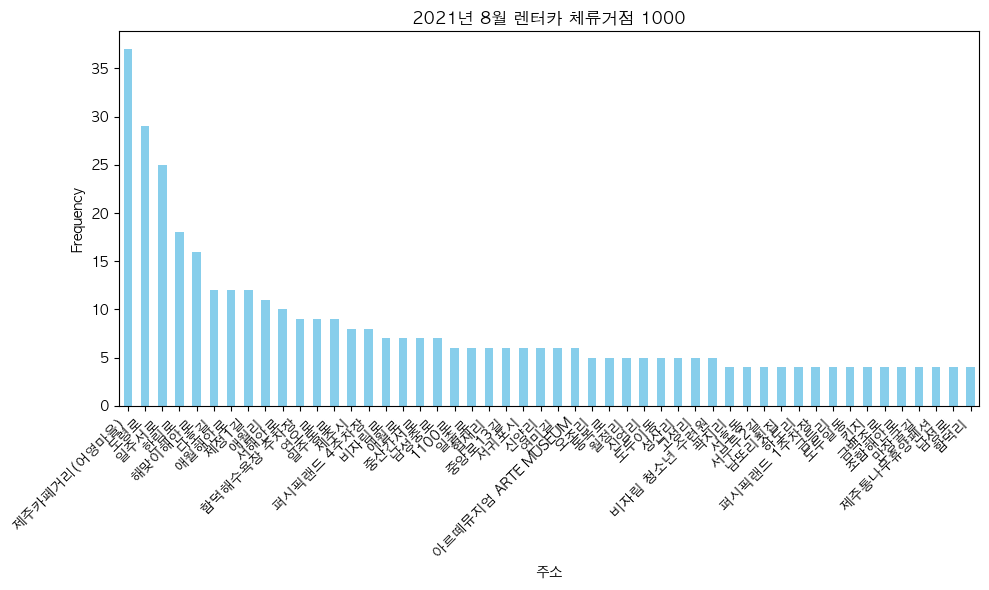

In [49]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

# '맑은 고딕' 폰트 설정
fm._get_fontconfig_fonts()
matplotlib.rc('font', family='AppleGothic')

# 'last_part' 열에서 키워드 빈도 계산
keyword_counts = foothold_df['last_part'].value_counts()

# 가장 많이 나오는 키워드 순으로 정렬
sorted_keywords = keyword_counts.sort_values(ascending=False)

# 상위 10개 키워드 추출 (원하는 개수로 수정 가능)
top_keywords = sorted_keywords.head(50)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title('2021년 8월 렌터카 체류거점 1000')
plt.xlabel('주소')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()